In [1]:
import bs4 as bs
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as pplt
import os 
import pprint as p

#Die Buch-Kürzel des alten Testaments
AT = ["Gn", "Ex", "Lv", "Nm", "Dt", "Ios", "Idc", "Rt", "1Sm", "2Sm", "3Rg", "4Rg", "1Par", "2Par", "Esr", "Neh", "Tb",
      "Idt", "Est", "1Mcc"
    , "2Mcc", "3Mcc", "4Mcc", "Iob", "Ps", "Prv", "Ecl", "Ct", "Sap", "Sir", "Is", "Ier", "Lam", "Bar", "Ez", "Dn",
      "Os", "Ioel", "Am", "Abd"
    , "Ion", "Mi", "Na", "Hab", "So", "Agg", "Za", "Mal"]


  



    

In der folgenden Zelle wird Suppe gemacht: 
Wir suchen alle refs, die das Attribut 'cref' haben, sowie alle note, die ein ref mit cref haben. 

In [2]:
#old version
with open(f'interim.xml', 'r') as f:
    file = f.read()   
soup = bs.BeautifulSoup(file, 'lxml')
Refs = soup.select('ref[cRef]')

data = []
for ref in Refs:
    if ref.get('cref').split('_')[0] in AT:
        data.append((ref.get('cref') , 'at', ref.getText() , ref.parent.find_previous_sibling('q')))
    else:
        data.append((ref.get('cref') , 'nt', ref.getText() , ref.parent.find_previous_sibling('q')))

    #die nun gefüllte Liste wird zum pd.DataFrame (df_data) konvertiert und die Spaltenbezeichnungen angepasst
df_data = pd.DataFrame(data)
df_data.columns = ['kuerzel', 'atnt', 'stelle', 'zitat']

qs = []
for ref in Refs:
    if ref.parent.find_previous_sibling() == ref.parent.find_previous_sibling("q"):
        qs.append(ref.parent.find_previous_sibling("q"))

        


stellen = []
for i in range (0, len(df_data)):
    if df_data['zitat'][i] is not None:
        stellen.append(df_data['stelle'][i])
        

        
quote_len=0
for i in range(len(df_data)):
    if (df_data['zitat'][i] != 'not a direct quote'):
        quote_len +=len(str(df_data['zitat'][i].getText()).replace(" ", ""))
    i+=1
test = bs.BeautifulSoup(file, 'lxml')

test_soup = test.select('div')
total_len=0
for i in range(len(test_soup)):
    total_len += len(test_soup[i].getText().replace(" ", ""))
print(f"Anzahl an erfassten Bibelstellen: {len(Refs)}")
print("Gesamtlänge:" + str(total_len))
print("Zitatlänge :"+str(quote_len))    
print("Prozentualer Anteil: " +(str(percent_calc(quote_len, total_len))))
print("Davon wörtl. zitiert:" + str(len(qs)))

        

AttributeError: 'NoneType' object has no attribute 'getText'

In [ ]:
print(df_data["stelle"].value_counts()[:10].plot(figsize=(3,3), kind="barh", legend=False, title="Augsburger Interim nach Stellen", color="red"))


In [ ]:
print(df_data["kuerzel"].value_counts().plot(figsize=(8,8), kind="pie", legend=False, title="Augsburger Interim"))

In [ ]:
print(df_data["atnt"].value_counts().plot(figsize=(8,8), kind="pie", legend=False, title="Augsburger Interim"))

In [ ]:
df_data.groupby("atnt").count()

Einzelne Kapitel folgen hier

Die Visualisierungen und Aussagen für einzelne Kapitel:

In [ ]:
data =[]
with open(f'interim_26/ch_07.xml', 'r') as f:
    file = f.read()   
soup = bs.BeautifulSoup(file, 'lxml')
Refs = soup.select('ref[cRef]')

data = []

for ref in Refs:
    if len(Refs) > 0: 
        if ref.get('cref').split('_')[0] in AT:
            data.append((ref.get('cref') , 'at', ref.getText() , ref.parent.find_previous_sibling('q')))
        else:
            data.append((ref.get('cref') , 'nt', ref.getText() , ref.parent.find_previous_sibling('q')))
    else:
        data.append(("keine Stelle", "keine Stelle", "keine Stelle" , "keine Stelle"))


    #die nun gefüllte Liste wird zum pd.DataFrame (df_data) konvertiert und die Spaltenbezeichnungen angepasst
df_data = pd.DataFrame(data)
df_data.columns = ['kuerzel', 'atnt', 'stelle', 'zitat']

stellen = []
for i in range (0, len(df_data)):
    if df_data['zitat'][i] != 'not a direct quote':
        stellen.append(df_data['stelle'][i])
p.pprint(stellen)

quote_len=0
for i in range(len(df_data)):
    if (df_data['zitat'][i] is not None):
        quote_len +=len(str(df_data['zitat'][i].getText()).replace(" ", ""))
    i+=1
test = bs.BeautifulSoup(file, 'lxml')

test_soup = test.select('div')
total_len=0
for i in range(len(test_soup)):
    total_len += len(test_soup[i].getText().replace(" ", ""))
print(f"Anzahl an erfassten Bibelstellen: {len(Refs)}")
print("Gesamtlänge:" + str(total_len))
print("Zitatlänge :"+str(quote_len))    
print("Prozentualer Anteil: " +(str(percent_calc(quote_len, total_len))))
print("Davon wörtl. zitiert:" + str(len(stellen)))

stellen=[]


In [ ]:
print(df_data["kuerzel"].value_counts().plot(figsize=(8,8), kind="pie", legend=False, title="Augsburger Interim - 7"))

Kapitel 2:

In [ ]:
for i in range (0, len(df_data)):
    if df_data['zitat'][i] is not None:
        print(df_data['stelle'][i])

In [ ]:

for i in range (0, len(df_data)):
    if df_data['zitat'][i] is not None:
        print(df_data['zitat'][i].getText())

# Öffnen und Vorbereitung

An dieser Stelle wird die integrierte Methode open() zum öffnen der XML-Datei genutzt. 
BeautifulSoup bereitet die Daten für das Scrapen vor.

In [ ]:
with open(f'interim2.xml', 'r') as f:
    file = f.read()   
soup = bs.BeautifulSoup(file, 'lxml')
Refs = soup.select('ref[cRef]')


In [ ]:
# Eine leere Liste wird erstellt und mit den Bibelstellen gefüllt. Hierbei wird sortiert, ob sie im Alten Testament stehen oder nicht. 
# Ein zweites Auswahlkriterium ist die Frage, ob direkt vor dem Eltern-ELement des <ref type='biblical'> ein <q> steht, und somit ein direktes Zitat vorliegt.
data = []
for ref in Refs:
    if ref.get('cref').split('_')[0] in AT:
        for ref in Refs:
            if ref.parent.previous_sibling == ref.parent.find_previous_sibling("q"):
                data.append((ref.get('cref') , 'at', ref.getText() , ref.parent.find_previous_sibling('q').get_text(' ',strip=True) if ref.parent.find_previous_sibling() == ref.parent.find_previous_sibling('q') else 'not a direct quote'))
    else:
        for ref in Refs:
            if ref.parent.previous_sibling == ref.parent.find_previous_sibling("q"):
                data.append((ref.get('cref') , 'nt', ref.getText() , ref.parent.find_previous_sibling('q').get_text(' ',strip=True) if ref.parent.find_previous_sibling() == ref.parent.find_previous_sibling('q') else 'not a direct quote'))

Diese Liste enthält nun also die Einträge nach folgendem Muster:<br>
**('Sir_15,14', 'at', 'Sir 15,14', 'hat in Gott gelassen inn der hand seines eig - nen Raths')**<br>
im nächsten Schritt wird sie in einen Dataframe konvertiert und der Header entsprechend gesetzt.

In [ ]:
# der eigentliche Dataframe wird gesetzt
df_data = pd.DataFrame(data)
# der Header wird gesetzt.
df_data.columns = ['kuerzel', 'atnt', 'stelle', 'zitat']



stellen = []
for i in range (0, len(df_data)):
    if df_data['zitat'][i] != 'not a direct quote':
        stellen.append(df_data['stelle'][i])


# Hier wird eine Liste der wörtlichen Zitate erstellt
qs = []
for ref in Refs:
    if ref.parent.find_previous_sibling() == ref.parent.find_previous_sibling("q"):
        qs.append(ref.parent.find_previous_sibling("q").get_text(" ", strip=True))


# Zählen der Gesamtlänge des zitierten Textes; one Leerzeilen und Zeilenumbrüche 
quote_len = 0
for i in range(len(qs)):
    quote_len +=len(qs[i].replace(" ","").replace("\n", ""))
    i+=1



ges = bs.BeautifulSoup(file, 'lxml')

ges_soup = ges.select('div')
total_len=0
for i in range(len(ges_soup)):
    total_len += len(ges_soup[i].getText().replace(" ", "").replace("n", ""))
print(f"Anzahl an erfassten Bibelstellen: {len(Refs)}")
print(f"wörtliche Zitate: {len(qs)}")
print("Gesamtlänge:" + str(total_len))
print("Zitatlänge :"+str(quote_len))    
print("Prozentualer Anteil: " +(str(percent_calc(quote_len, total_len))))


# Auswertungen

Alle vorkommenden Stellen in einem Tortendiagram. 

AxesSubplot(0.1275,0.11;0.77x0.77)


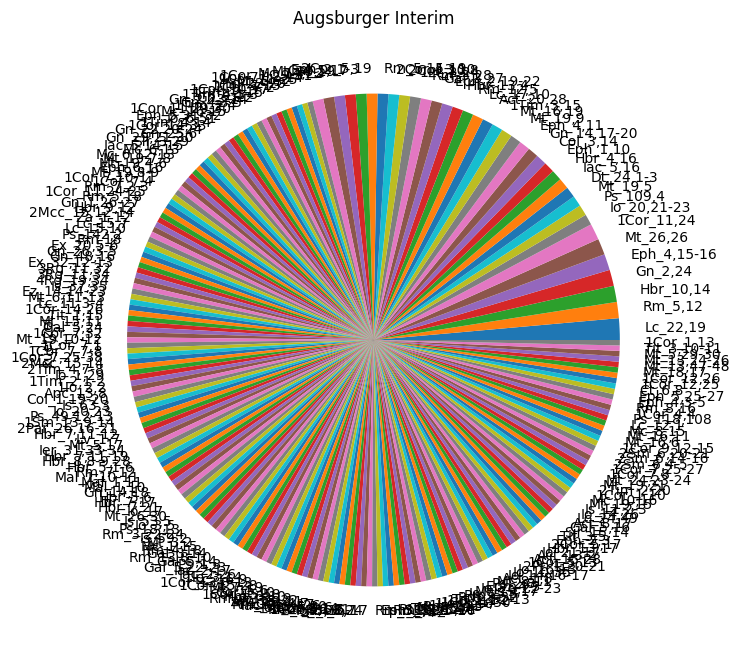

In [3]:
print(df_data["kuerzel"].value_counts().plot(figsize=(8,8), kind="pie", legend=False, title="Augsburger Interim"))

Visualisierung nach Zugehörigkeit zum Alten Testament.

AxesSubplot(0.1275,0.11;0.77x0.77)


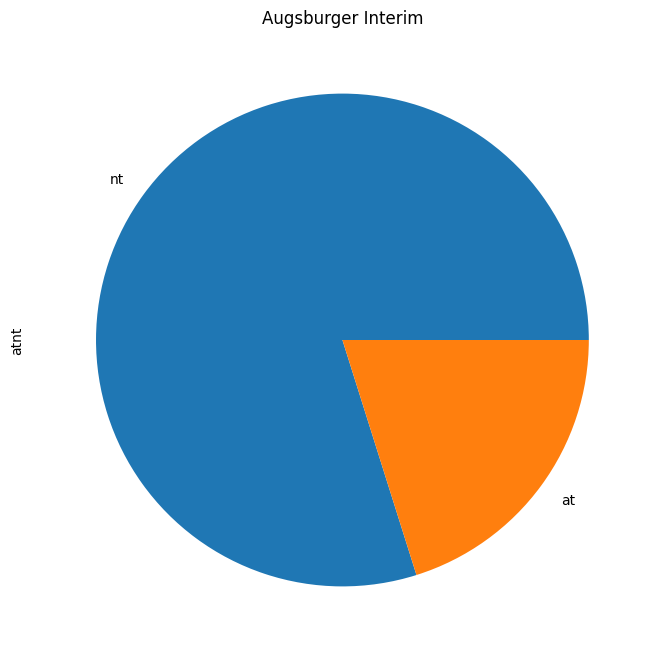

In [4]:
print(df_data["atnt"].value_counts().plot(figsize=(8,8), kind="pie", legend=False, title="Augsburger Interim"))

283
AxesSubplot(0.125,0.11;0.775x0.77)


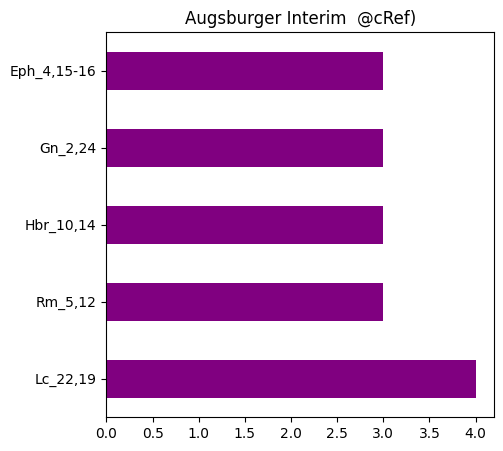

In [6]:
print(len(df_data))
print(df_data["kuerzel"].value_counts()[:5].plot(figsize=(5,5), kind="barh", legend=False, title="Augsburger Interim  @cRef)", color="purple"))

AxesSubplot(0.125,0.11;0.775x0.77)


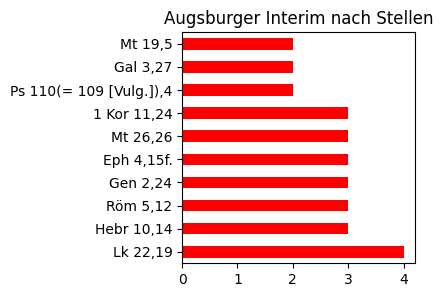

In [7]:
print(df_data["stelle"].value_counts()[:10].plot(figsize=(3,3), kind="barh", legend=False, title="Augsburger Interim nach Stellen", color="red"))